In [110]:
import dicom
import os
import numpy as np
import glob
import cv2
%matplotlib inline
import matplotlib.pyplot as py
import SimpleITK as sitk
from PIL import Image
from scipy.misc import imrotate

In [111]:
def get_NewOrientation(img_array):
    y, x = np.nonzero(img_array)
    x = x - np.mean(x)
    y = y - np.mean(y)
    coords = np.vstack([x, y])
    cov = np.cov(coords)
    evals, evecs = np.linalg.eig(cov)
    sort_indices = np.argsort(evals)[::-1]
    x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
    x_v2, y_v2 = evecs[:, sort_indices[1]]
    return (x_v1,y_v1), (x_v2,y_v2)

In [112]:
#Kaggle Training Images Path
L=glob.glob("/Users/egouda/Downloads/train/*/*/*/*")

In [113]:
#Get all the file names for the Kaggle Images
lstFilesKaggle_train=L
#Get a list of all the paths for the sax images
lstFilesKaggle_train_sax = [s for s in lstFilesKaggle_train if "sax" in s]

In [114]:
def getAlignImg(t,label = None):#!!!notice, only take uint8 type for the imrotate function!!!
    f = lambda x:np.asarray([float(a) for a in x]);
    o = f(t.ImageOrientationPatient);
    o1 = o[:3];
    o2 = o[3:];
    oh = np.cross(o1,o2);
    or1 = np.asarray([0.6,0.6,-0.2]);
    o2new = np.cross(oh,or1);
    theta = np.arccos(np.dot(o2,o2new)/np.sqrt(np.sum(o2**2)*np.sum(o2new**2)))*180/3.1416;
    #print theta
    print  np.arccos(np.dot(o2,o2new)/np.sqrt(np.sum(o2**2)*np.sum(o2new**2)));
    theta = theta * np.sign(np.dot(oh,np.cross(o2,o2new)));
    #print theta
    im_max = np.percentile(t.pixel_array.flatten(),99);
    res = imrotate(np.array(np.clip(np.array(t.pixel_array,dtype=np.float)/im_max*256,0,255),dtype=np.uint8),theta);
    if label is None:
        return res;
    else:
        lab = imrotate(label,theta);
        return res,lab

In [115]:
img={}
align_img=[]

for i in range(15):
    rand=np.random.randint(0,len(lstFilesKaggle_train_sax))
    tmp_img=dicom.read_file(lstFilesKaggle_train_sax[rand])
    img[lstFilesKaggle_train_sax[rand]]=tmp_img
    align=getAlignImg(tmp_img,label=None)
    align_img.append(align)

1.11762922458
0.216986144482
0.00649339583004
0.174549096505
0.202023036288
1.0633962172
0.565467856366
0.329276572755
0.40734579147
0.172430992418
0.0165697154346
0.300215331901
0.131268595399
0.182474050727
0.642844047838


In [116]:
keys=img.keys()

/Users/egouda/Downloads/train/383/study/sax_41/IM-9975-0022.dcm
Image size: (192, 256)
(0.99893583322901081, -0.046121590291985953)


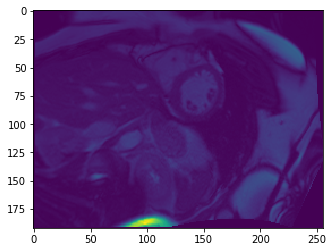

In [117]:
print (keys[0])
print ('Image size: %s' %str((img[keys[0]].pixel_array.shape)))
py.imshow(img[keys[0]].pixel_array)
print get_NewOrientation(img[keys[0]].pixel_array)[0]

In [120]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.
imread(img[keys[0]].pixel_array,0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

NameError: name 'imread' is not defined

In [ ]:
img = cv2

Image size: (192, 256)
(0.82974878149962206, -0.55813704374453799)


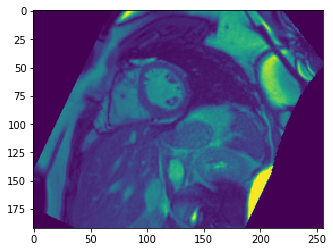

In [118]:
print ('Image size: %s' %str((align_img[0].shape)))
py.imshow(align_img[0])
print get_NewOrientation(align_img[0])[0]

/Users/egouda/Downloads/train/122/study/sax_9/IM-10776-0013.dcm
Image size: (256, 192)
((-0.069262492024275188, -0.99759846992594525), (-0.99759846992594525, 0.069262492024275188))


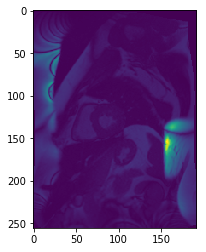

In [62]:
print (keys[1])
print ('Image size: %s' %str((img[keys[1]].pixel_array.shape)))
py.imshow(img[keys[1]].pixel_array)
print get_NewOrientation(img[keys[1]].pixel_array)

Image size: (256, 192)
((0.04795886418851867, -0.99884931163101232), (-0.99884931163101232, -0.04795886418851867))


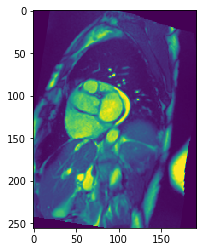

In [63]:
print ('Image size: %s' %str((align_img[1].shape)))
py.imshow(align_img[1])
print get_NewOrientation(align_img[1])

In [64]:
def crop_size(res):
    shift  = np.array([0,0])
    img_L=int(np.min(res.shape)) #NEED TO UPDATE BASED ON COMMON IMAGE 
    if res.shape[0]>res.shape[1]:
        s = (res.shape[0]-res.shape[1])//2;
        res = res[s:s+res.shape[1],:];
        shift[1] = s;
    else:
        s = (res.shape[1]-res.shape[0])//2;
        res = res[:,s:s+res.shape[0]];
        shift[0] = s;

        #crop or stretch to the same size
    if img_L>0 and (res.shape[0] != img_L):
        #print("crop or fill",filename);
        if res.shape[0]>img_L:#because h=w after crop
            s = (res.shape[0]-img_L)//2;
            res = res[s:s+img_L,s:s+img_L];
            shift = shift + s;
        else:
            s = (img_L-res.shape[0])//2;
            res2 = np.zeros((self.img_L,img_L));
            res2[s:s+res.shape[0],s:s+res.shape[0]] = res;
            res = res2;
            shift = shift - s;
    return res

Image size: (256, 192)
((0.6006888120998225, -0.79948292728369397), (-0.79948292728369397, -0.6006888120998225))


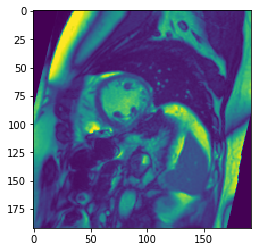

In [65]:
img_crop_0=crop_size(align_img[0])
print 'Image size: %s' %str(align_img[0].shape)
py.imshow(img_crop_0)
print get_NewOrientation(img_crop_0)

Image size: (256, 192)
((0.5697471938244093, -0.82182001382858216), (-0.82182001382858216, -0.5697471938244093))


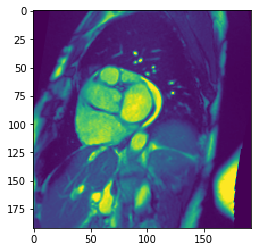

In [66]:
img_crop_1=crop_size(align_img[1])
print 'Image size: %s' %str(align_img[1].shape)
py.imshow(img_crop_1)
print get_NewOrientation(img_crop_1)

In [67]:

import math

def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))

def length(v):
  return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
  return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))

In [96]:
angle(get_NewOrientation(img[keys[0]].pixel_array)[0],get_NewOrientation(align_img[0])[0])

1.0481906008455966

In [74]:
0.266263599689-0.16522886270538104

0.10103473698361895

In [75]:
math.degrees(0.10103473698361895)

5.7888640133756954